In [1]:
import pandas as pd   # data preprocessing
import numpy as np   # mathematical computations
import matplotlib.pyplot as plt # visualization
import seaborn as sns    # visualization
import plotly.express as px # visualization

# from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# df is a varaible in data[frame is stored
data = pd.read_csv('/kaggle/input/oil-spill-detection/oil_spill.csv')
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [3]:
data.shape # shape of the Data

(937, 50)

## Data Preprocessing

In [4]:
null_value = data.isnull().sum()
null_values = null_value[null_value>0]
null_values

Series([], dtype: int64)

In [5]:
data.duplicated().sum()

0

In [6]:
data.dtypes.value_counts()

float64    39
int64      11
dtype: int64

In [7]:
data['target'].value_counts()

0    896
1     41
Name: target, dtype: int64

In [8]:
data1 = data.copy()

## EDA - Exploratoty Data Analaysis

In [9]:
data.columns

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49', 'target'],
      dtype='object')

In [10]:
data.describe().T.style.background_gradient(cmap='Oranges', low=0.5, high=1.0)

,count,mean,std,min,25%,50%,75%,max
f_1,937.000000,81.588047,64.976730,1.000000,31.000000,64.000000,124.000000,352.000000
f_2,937.000000,332.842049,1931.938570,10.000000,20.000000,65.000000,132.000000,32389.000000
f_3,937.000000,698.707086,599.965577,1.920000,85.270000,704.370000,1223.480000,1893.080000
f_4,937.000000,870.992209,522.799325,1.000000,444.200000,761.280000,1260.370000,2724.570000
f_5,937.000000,84.121665,45.361771,0.000000,54.000000,73.000000,117.000000,180.000000
f_6,937.000000,769696.378869,3831151.032065,70312.000000,125000.000000,186300.000000,330468.000000,71315000.000000
f_7,937.000000,43.242721,12.718404,21.240000,33.650000,39.970000,52.420000,82.640000
f_8,937.000000,9.127887,3.588878,0.830000,6.750000,8.200000,10.760000,24.690000
f_9,937.000000,3940.712914,8167.427625,667.000000,1371.000000,2090.000000,3435.000000,160740.000000
f_10,937.000000,0.221003,0.090316,0.020000,0.160000,0.200000,0.260000,0.740000


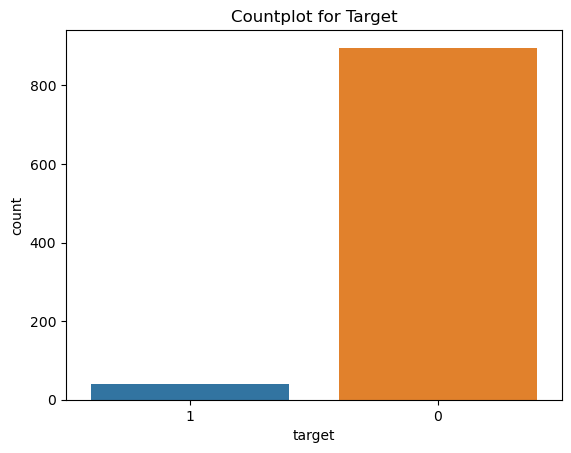

In [11]:
sns.countplot(x=data['target'],order=data['target'].value_counts().sort_values().index)
plt.title('Countplot for Target')
plt.show()

In [12]:
corr = data.corr()

<AxesSubplot:>

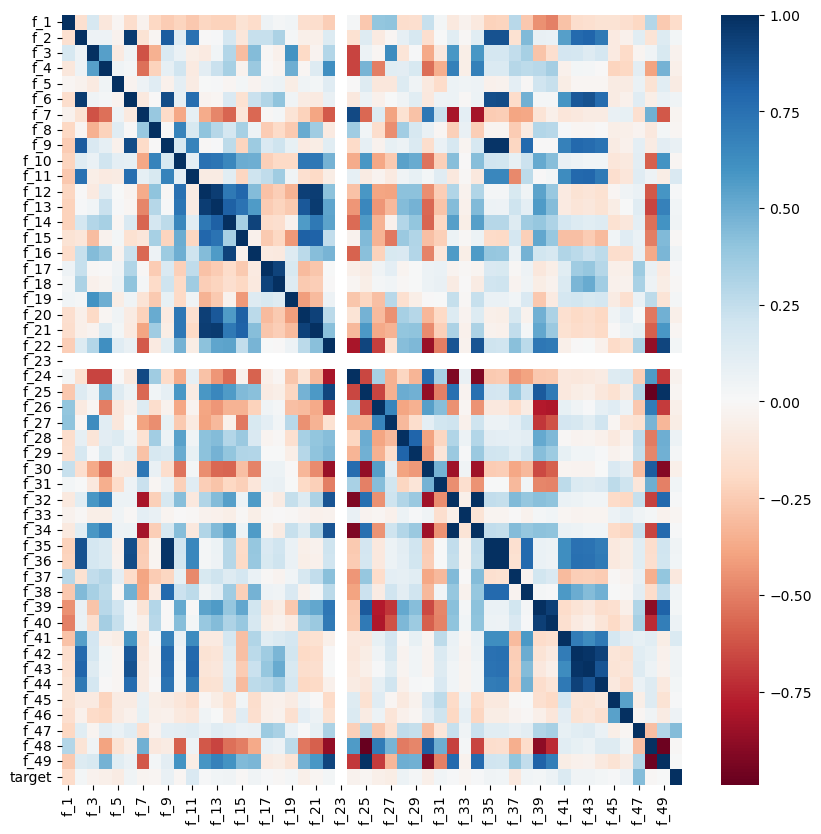

In [13]:
plt.figure(figsize=[10,10])
sns.heatmap(corr,cmap='RdBu')

In [14]:
f = ['f_1','f_9','f_15','f_26','f_37',]
data[f].head()

,f_1,f_9,f_15,f_26,f_37
0,1,29780.0,0.10,-0.01,0.00
1,2,61900.0,0.01,-0.01,0.00
2,3,3340.0,0.17,-0.01,0.01
3,4,18030.0,0.10,-0.01,0.00
4,5,3350.0,0.09,-0.01,0.00


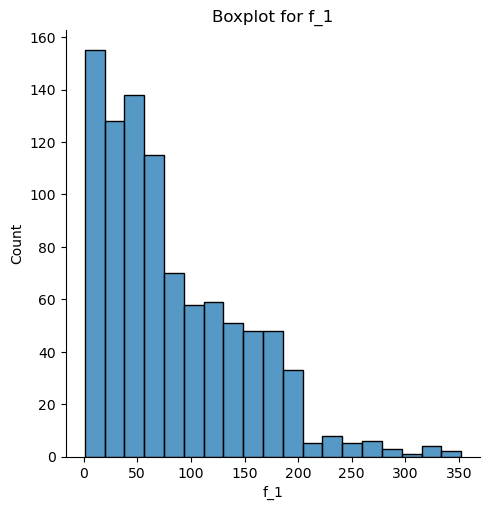

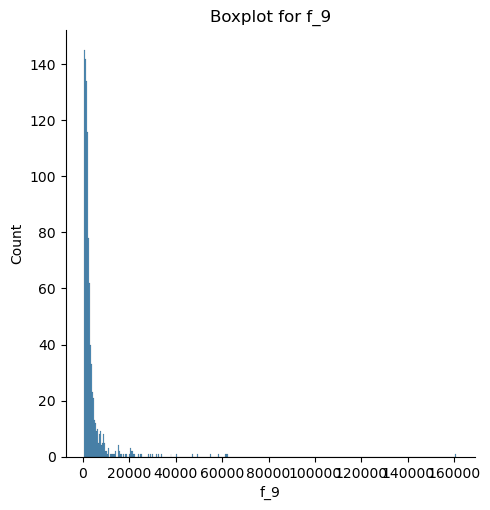

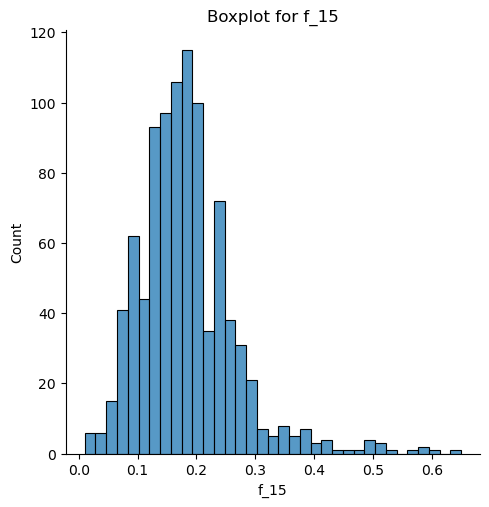

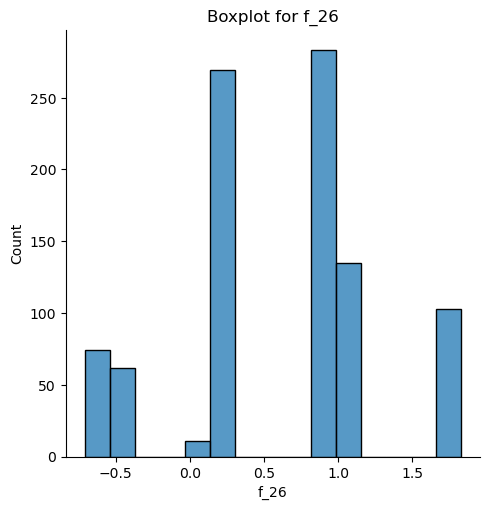

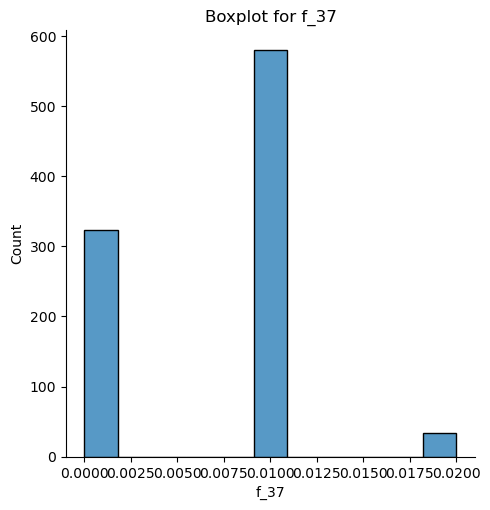

In [15]:
for i in f:
    sns.displot(x=data[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [16]:
for i in f:
    print(f'Name of column: {i}')
    print('Number of rows having values >0')
    print(data[data[i]>0].shape)
    print('-'*35)

Name of column: f_1
Number of rows having values >0
(937, 50)
-----------------------------------
Name of column: f_9
Number of rows having values >0
(937, 50)
-----------------------------------
Name of column: f_15
Number of rows having values >0
(937, 50)
-----------------------------------
Name of column: f_26
Number of rows having values >0
(790, 50)
-----------------------------------
Name of column: f_37
Number of rows having values >0
(613, 50)
-----------------------------------


In [17]:
corr = data.corr()

<AxesSubplot:ylabel='f_21'>

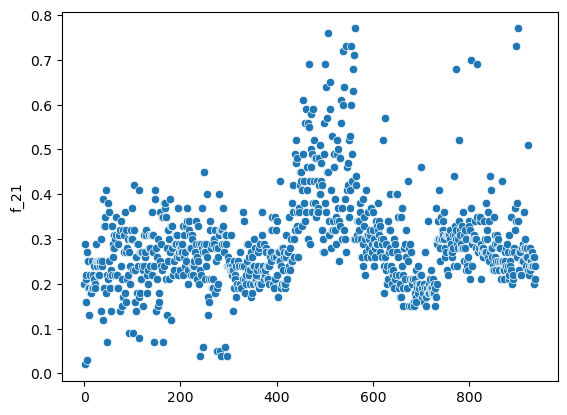

In [18]:
sns.scatterplot(data['f_21'])

## Oil Spill Accuracy

In [19]:
# Separate the features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9680851063829787
